In [ ]:
## Colab link:- https://colab.research.google.com/drive/18unOJF2QepD29gl8YvGBX71bXAPD52V0

In [1]:
!nvidia-smi

Mon Dec 13 06:32:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2021-12-13 06:32:01--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2021-12-13 06:32:02--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3df7d92f10172abd47c8192c7f.dl.dropboxusercontent.com/zip_download_get/A_J5uOvRohiaDl4T6k945z1ePR-JiYbf3Rf8XblD5uoUhD0xhpRtgZFDueRz5kBIWQCqhfCd9FiUKwyytuMJEyqF9243cTlmm67n8HcpP99o5Q# [following]
--2021-12-13 06:32:02--  https://uc3df7d92f10172abd47c8192c7f.dl.dropboxusercontent.com/zip_download_get/A_J5uOvRohiaDl4T6k945z1ePR-JiYbf3Rf8XblD5uoUhD0xhpRtgZFDueRz5kBIWQCqhfCd9FiUK

In [3]:
# Unzip the data
# (AABXTlPlU-1f4L_VdS4wY06ca?dl=0) Folder gets Downloaded
!unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  


In [4]:
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


In [5]:
import os, shutil
folders = os.listdir("Images")

In [6]:
print(folders)

['horses', 'dogs', 'cats', 'humans']


In [7]:
#Number Of Images In Every Folder
for f in folders:
  path="Images/"+f

  print(f+" "+str(len(os.listdir(path))))

horses 202
dogs 202
cats 202
humans 202


In [8]:
# Checks if val_images exist or not 
# val_image is just to create validation set
if not os.path.isdir("val_images"):
    os.mkdir("val_images")

!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data   val_images


In [9]:
# 90% images are used as training example and 10% of the images are used for validation

classes = ["dogs","cats","horses","humans"]

for c in classes:
    p = os.path.join("val_images",c) #val_images/cats
    if not os.path.isdir(p):
        os.mkdir(p)
      
SPLIT = 0.9
for f in os.listdir("Images"):
    path = "Images/"+f
    imgs = os.listdir(path)
    
    split_size = int(SPLIT*len(imgs))
    # Move the file (90% to 100%)
    files_to_move = imgs[split_size:]
    #print(len(files_to_move))
    #print(files_to_move)
    for img_f in files_to_move:
        src = os.path.join(path,img_f)
        dest = os.path.join("val_images/"+f,img_f)
        shutil.move(src,dest)
        #print(src)
        #print(dest)

In [10]:
print("Training Data")
for f in folders:
    path = "Images/"+f
    print(f+ " "+str(len(os.listdir(path))))
print('\n')
print("Validation Data")
for f in folders:
    path = "val_images/"+f
    print(f+ " "+str(len(os.listdir(path))))

Training Data
horses 181
dogs 181
cats 181
humans 181


Validation Data
horses 21
dogs 21
cats 21
humans 21


In [11]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

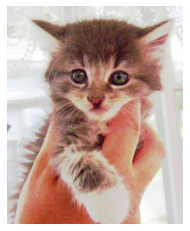

In [12]:
sample_path = "Images/cats/cat.100.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0 # Converting it into array
plt.imshow(img)
plt.axis("off")
plt.show()

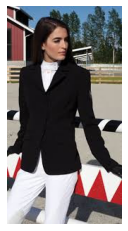

In [13]:
sample_path = "Images/humans/rider-100.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

In [14]:
from keras.layers import *
from keras.models import Sequential

In [15]:
model = Sequential()
# First Layer Of Convolution:-32 filters of size (3*3)
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
import tensorflow as tf

In [17]:

adam=tf.optimizers.Adam(learning_rate=1e-4)

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

In [18]:
#model.fit(___) # Useful when data set is small and it can fit inside the memory

# The dataset which we are using is small but this time we are going to use generator methode

In [19]:
from keras.preprocessing.image import ImageDataGenerator
# we are going to load a batch of images

In [20]:
# Validation_data is used to check the overfitting of our model.
# rescale->Divide each pixel of the image by 255.0
# The train_gen will load a batch of data in the memory and after processing the data
# the memory gets cleared to load the next set of data.
train_gen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_gen.flow_from_directory(
    "Images/",
    target_size=(150,150),
    batch_size=36,
    class_mode='categorical'
)
val_gen = ImageDataGenerator(rescale=1.0/255)

val_generator=val_gen.flow_from_directory(
    "val_images/",
    target_size=(150,150),
    batch_size=7,
    class_mode='categorical'
)

Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [21]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
val_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [23]:
# Loading every batch of data
for x,y in train_generator:
  print(x.shape)
  print(y.shape)
  break

(36, 150, 150, 3)
(36, 4)


In [24]:
# Train our model
history=model.fit_generator(
    train_generator,
    steps_per_epoch=5,# No. of steps required to iterate the whole training data for a given batch size in one epoch
    epochs=50,
    validation_data=val_generator,
    validation_steps=4
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
5/5 [==============================] - 14s 370ms/step - loss: 1.3865 - acc: 0.2770 - val_loss: 1.3761 - val_acc: 0.1786
Epoch 2/50
5/5 [==============================] - 1s 172ms/step - loss: 1.3922 - acc: 0.2500 - val_loss: 1.4141 - val_acc: 0.0714
Epoch 3/50
5/5 [==============================] - 1s 168ms/step - loss: 1.3850 - acc: 0.2838 - val_loss: 1.3780 - val_acc: 0.2143
Epoch 4/50
5/5 [==============================] - 1s 180ms/step - loss: 1.3791 - acc: 0.2778 - val_loss: 1.3779 - val_acc: 0.3214
Epoch 5/50
5/5 [==============================] - 1s 213ms/step - loss: 1.3721 - acc: 0.3778 - val_loss: 1.3655 - val_acc: 0.5357
Epoch 6/50
5/5 [==============================] - 1s 175ms/step - loss: 1.3644 - acc: 0.3446 - val_loss: 1.3692 - val_acc: 0.3571
Epoch 7/50
5/5 [==============================] - 1s 190ms/step - loss: 1.3610 - acc: 0.4667 - val_loss: 1.3615 - val_acc: 0.4643
Epoch 8/50
5/5 [==============================] - 1s 171ms/step - loss: 1.3530 - acc: 0.5

In [25]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [26]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")

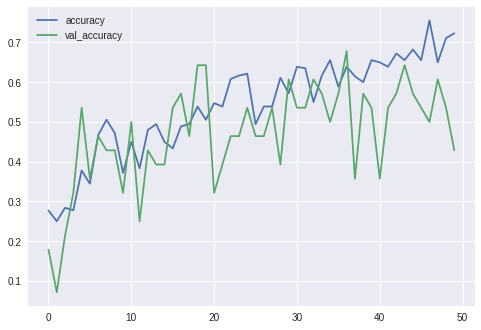

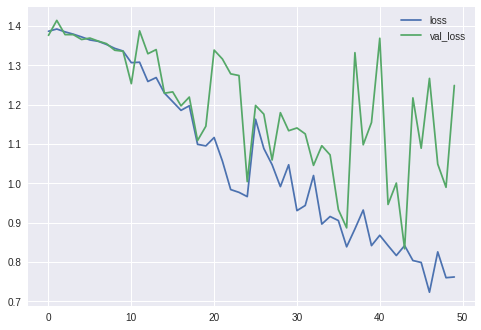

In [27]:
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val_accuracy")
plt.legend()
plt.show()
plt.plot(loss,label="loss")
plt.plot(val_loss,label="val_loss")
plt.legend()
plt.show()

In [28]:
# We are getting noisy curves as the dataset is small

In [29]:
### After knowing the correct number of epochs our model should train we will again train
# the model on whole traing data (including the validation data)